In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/laptop_prices.csv')
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
df.shape

(1275, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [ ]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [ ]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [ ]:
# Check for duplicates
df.drop_duplicates(inplace = True)

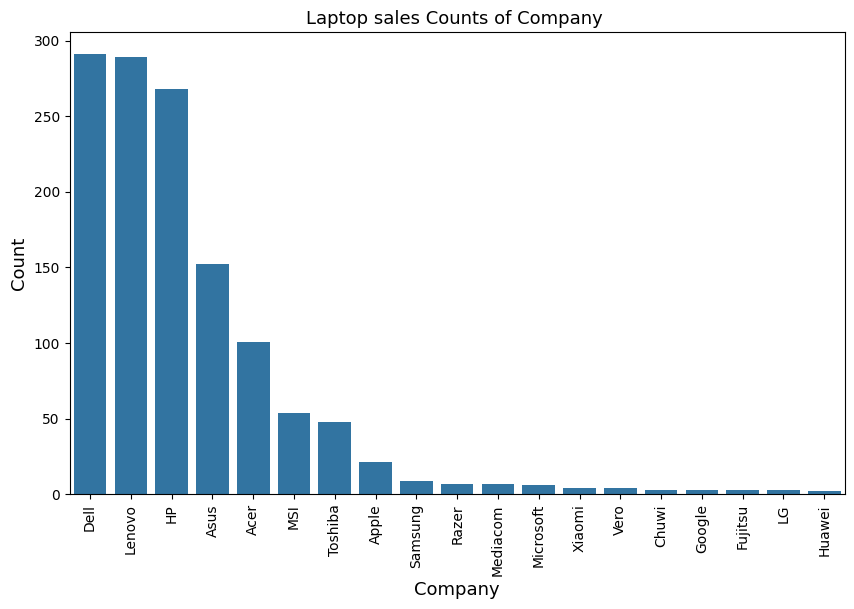

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Company', order=df['Company'].value_counts().index)
plt.title('Laptop sales Counts of Company ', fontsize = 13)
plt.xlabel('Company', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.xticks(rotation =90)
plt.show()

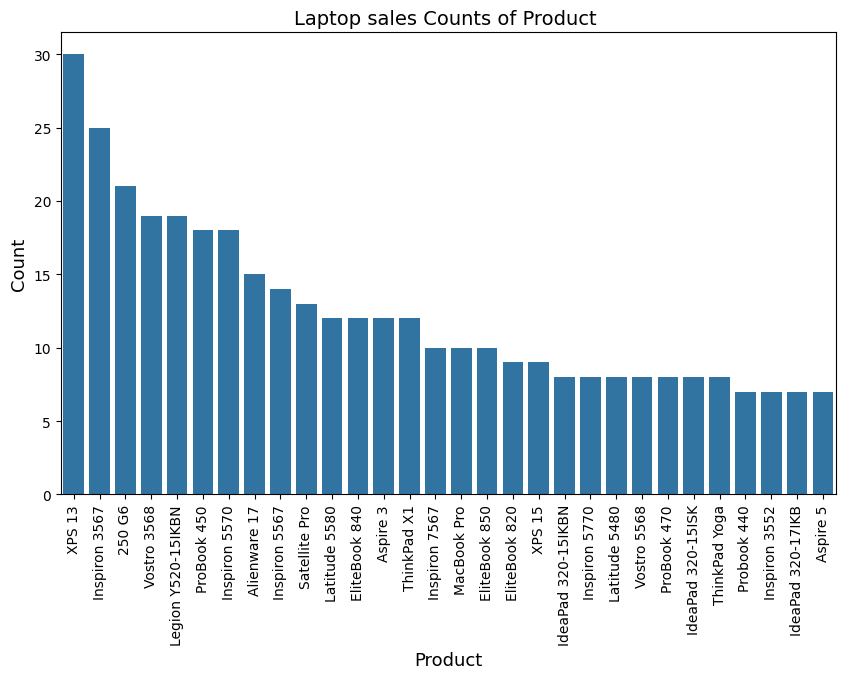

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product', order=df['Product'].value_counts().iloc[:30].index)
plt.title('Laptop sales Counts of Product ', fontsize = 14)
plt.xlabel('Product', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.xticks(rotation =90)
plt.show()

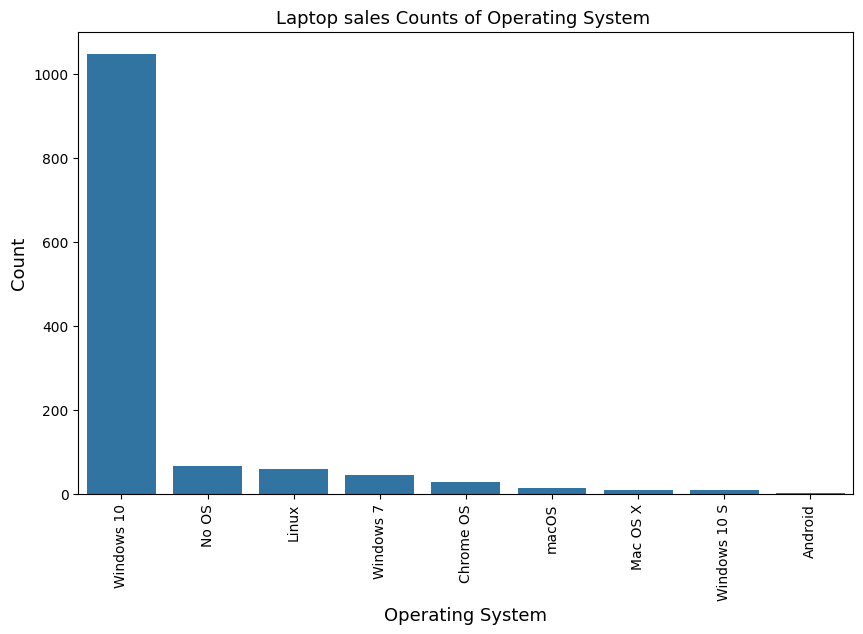

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='OS', order=df['OS'].value_counts().index)
plt.title('Laptop sales Counts of Operating System ', fontsize = 13)
plt.xlabel('Operating System', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.xticks(rotation =90)
plt.show()

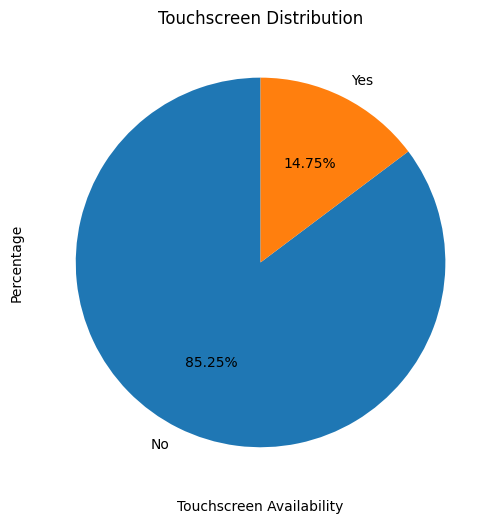

In [ ]:
plt.figure(figsize=(10,6))
touchscreen_counts = df['Touchscreen'].value_counts()
plt.pie(touchscreen_counts, labels = touchscreen_counts.index, autopct='%.2f%%', startangle =90)
plt.title('Touchscreen Distribution')
plt.xlabel('Touchscreen Availability')
plt.ylabel('Percentage')
plt.show()

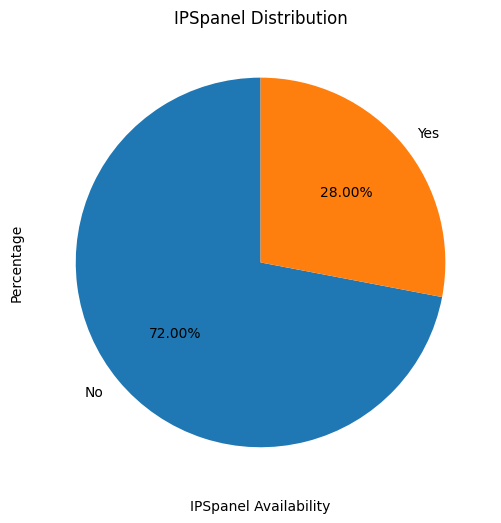

In [ ]:
plt.figure(figsize=(10,6))
IPSpanel_counts = df['IPSpanel'].value_counts()
plt.pie(IPSpanel_counts, labels = IPSpanel_counts.index, autopct='%.2f%%', startangle =90)
plt.title('IPSpanel Distribution')
plt.xlabel('IPSpanel Availability')
plt.ylabel('Percentage')
plt.show()

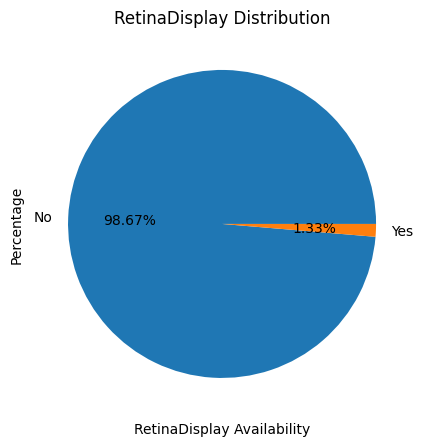

In [ ]:
plt.figure(figsize=(9,5))
RetinaDisplay_counts = df['RetinaDisplay'].value_counts()
plt.pie(RetinaDisplay_counts, labels = RetinaDisplay_counts.index, autopct='%.2f%%')
plt.title('RetinaDisplay Distribution')
plt.xlabel('RetinaDisplay Availability')
plt.ylabel('Percentage')
plt.show()

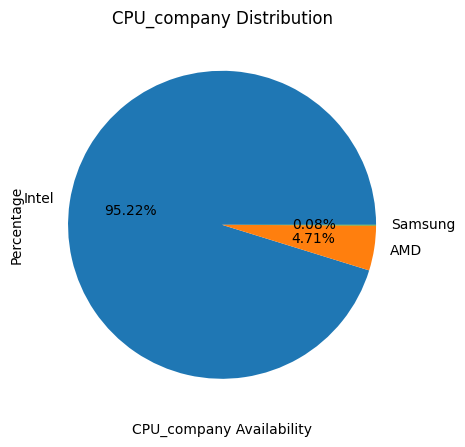

In [ ]:
plt.figure(figsize=(9,5))
CPU_company_counts = df['CPU_company'].value_counts()
plt.pie(CPU_company_counts, labels = CPU_company_counts.index, autopct='%.2f%%')
plt.title('CPU_company Distribution')
plt.xlabel('CPU_company Availability')
plt.ylabel('Percentage')
plt.show()

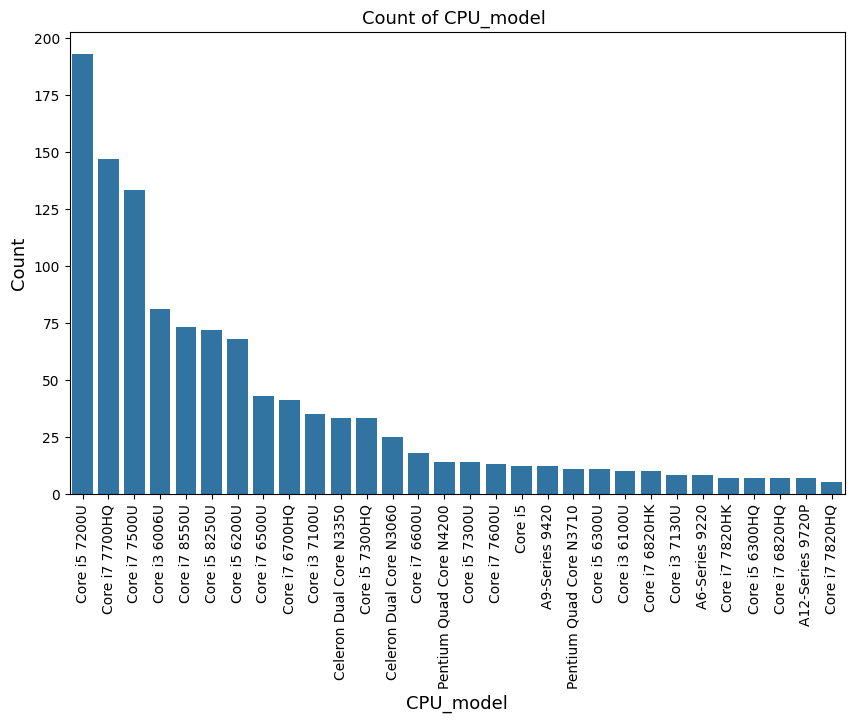

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CPU_model', order=df['CPU_model'].value_counts().iloc[:30].index)
plt.title('Count of CPU_model ', fontsize = 13)
plt.xlabel('CPU_model', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.xticks(rotation =90)
plt.show()

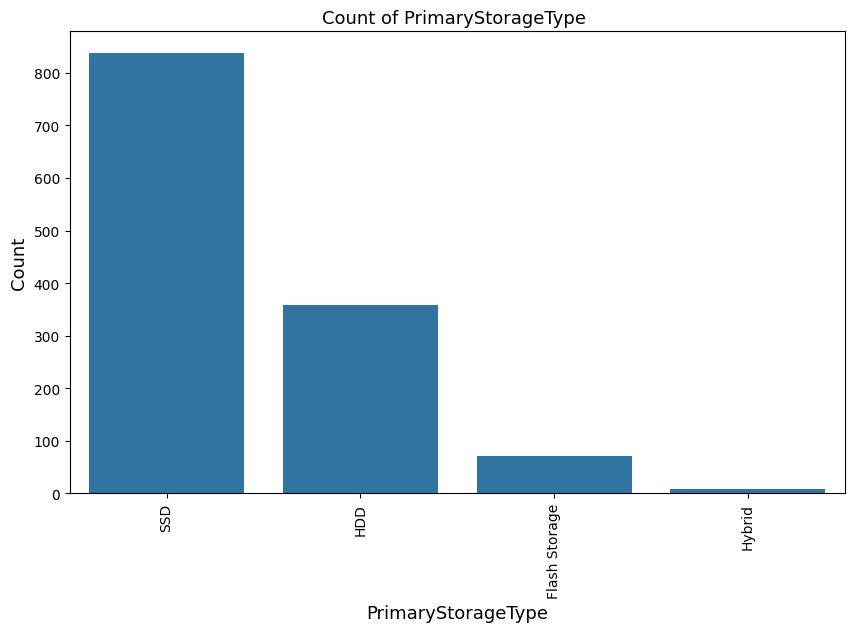

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PrimaryStorageType', order=df['PrimaryStorageType'].value_counts().index)
plt.title('Count of PrimaryStorageType ', fontsize = 13)
plt.xlabel('PrimaryStorageType', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.xticks(rotation =90)
plt.show()

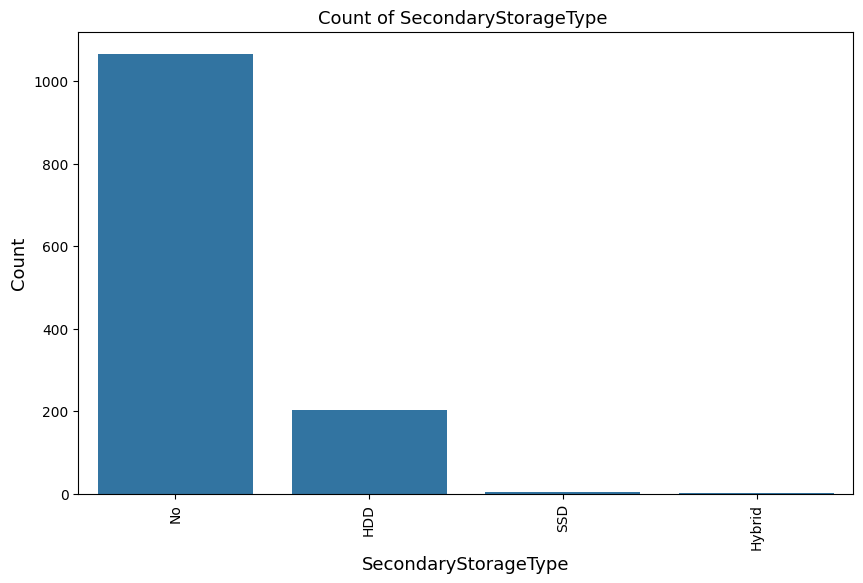

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SecondaryStorageType', order=df['SecondaryStorageType'].value_counts().index)
plt.title('Count of SecondaryStorageType ', fontsize = 13)
plt.xlabel('SecondaryStorageType', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.xticks(rotation =90)
plt.show()

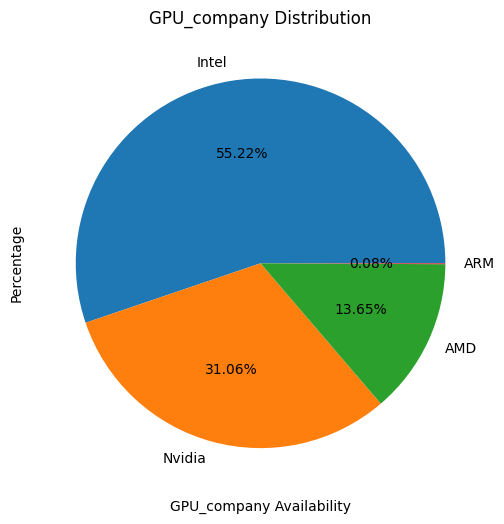

In [ ]:
plt.figure(figsize=(10,6))
GPU_company_counts = df['GPU_company'].value_counts()
plt.pie(GPU_company_counts, labels = GPU_company_counts.index, autopct='%.2f%%')
plt.title('GPU_company Distribution')
plt.xlabel('GPU_company Availability')
plt.ylabel('Percentage')
plt.show()

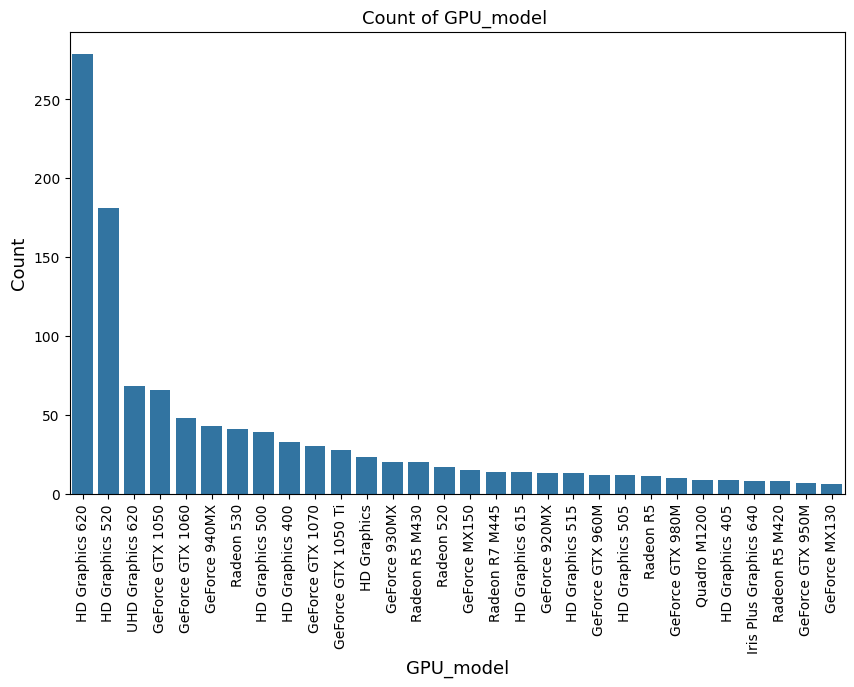

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='GPU_model', order=df['GPU_model'].value_counts().iloc[:30].index)
plt.title('Count of GPU_model ', fontsize = 13)
plt.xlabel('GPU_model', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.xticks(rotation =90)
plt.show()

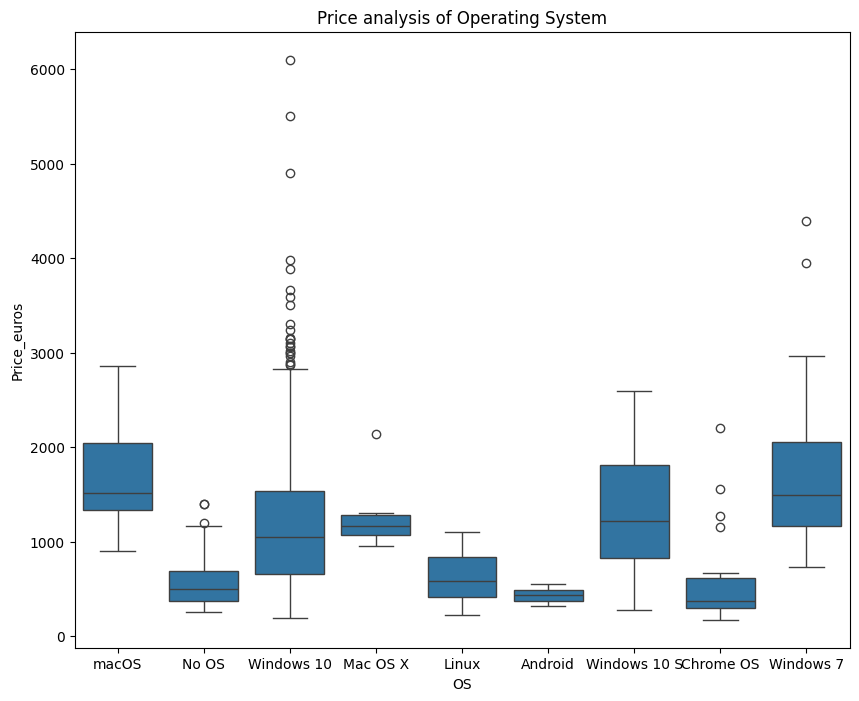

In [ ]:
plt.figure(figsize = (10,8))
sns.boxplot(x = df['OS'], y= df['Price_euros'])
plt.title('Price analysis of Operating System')
plt.xlabel('OS')
plt.ylabel('Price_euros')
plt.show()

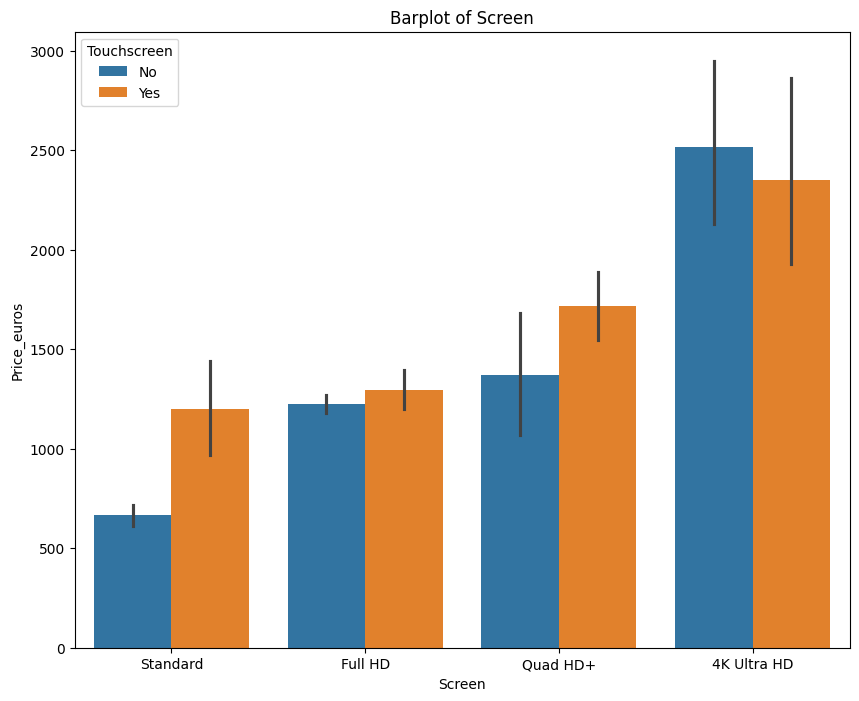

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = df['Screen'], y= df['Price_euros'] ,hue = df['Touchscreen'])
plt.title('Barplot of Screen')
plt.xlabel('Screen')
plt.ylabel('Price_euros')
plt.show()

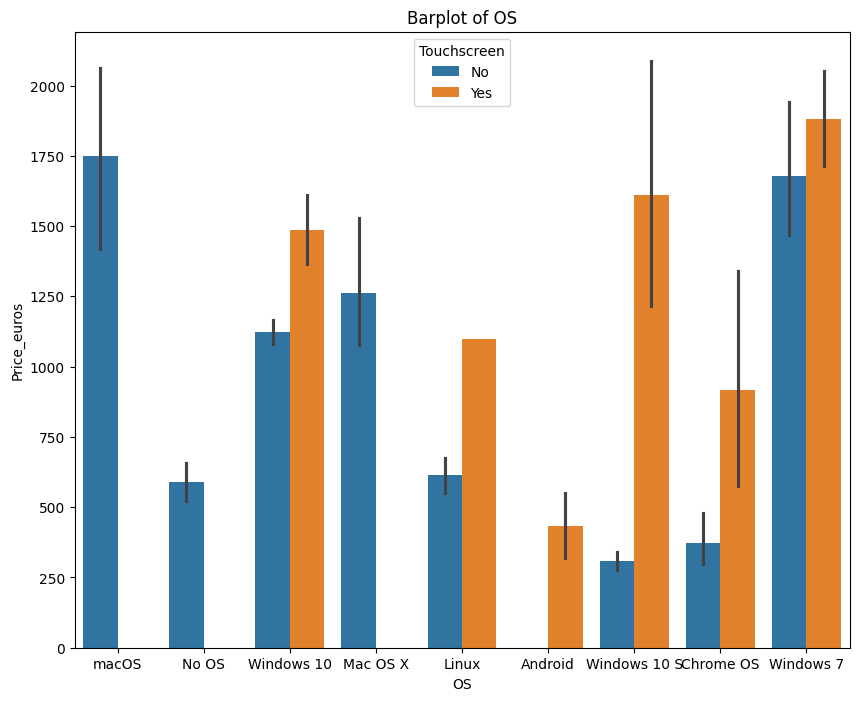

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = df['OS'], y= df['Price_euros'] , hue = df['Touchscreen'])
plt.title('Barplot of OS')
plt.xlabel('OS')
plt.ylabel('Price_euros')
plt.show()

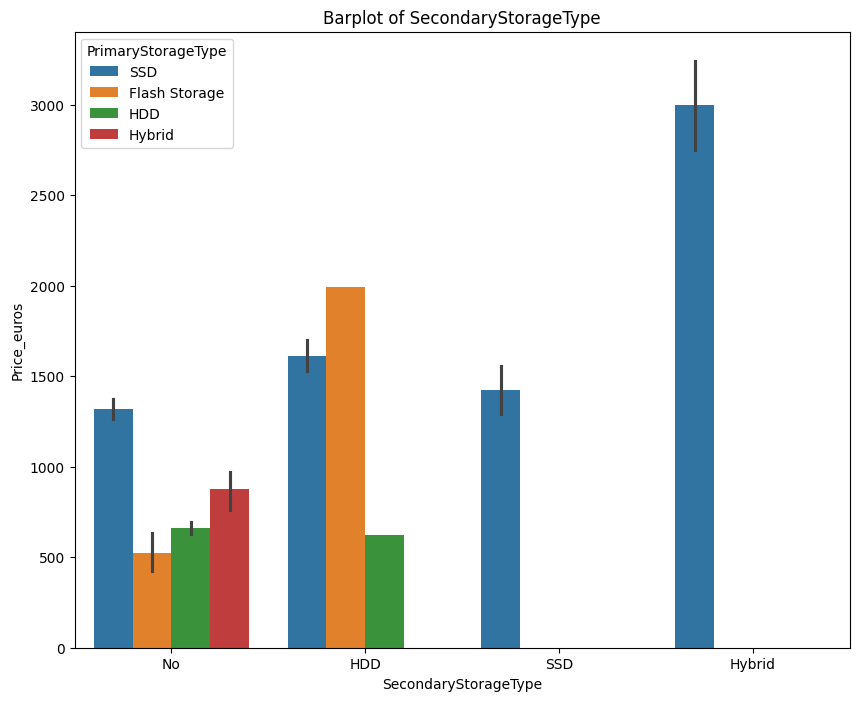

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = df['SecondaryStorageType'], y= df['Price_euros'], hue = df['PrimaryStorageType'])
plt.title('Barplot of SecondaryStorageType')
plt.xlabel('SecondaryStorageType')
plt.ylabel('Price_euros')
plt.show()

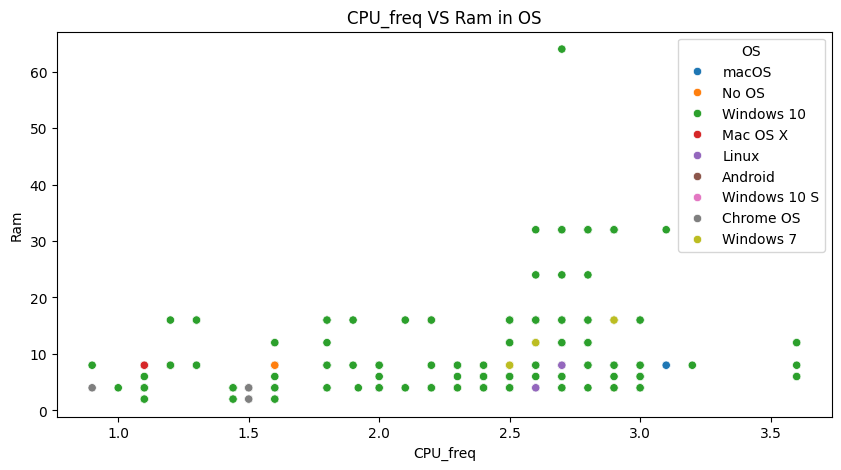

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = df , x= df['CPU_freq'], y =df['Ram'], hue = df['OS'])
plt.title('CPU_freq VS Ram in OS')
plt.xlabel('CPU_freq')
plt.ylabel('Ram')
plt.show()

In [ ]:
# Initialize label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# Encode categorical variables
df['Company'] = le.fit_transform(df['Company'])
df['Product'] = le.fit_transform(df['Product'])
df['TypeName'] = le.fit_transform(df['TypeName'])
df['OS'] = le.fit_transform(df['OS'])
df['Screen'] = le.fit_transform(df['Screen'])
df['Touchscreen'] = le.fit_transform(df['Touchscreen'])
df['IPSpanel'] = le.fit_transform(df['IPSpanel'])
df['RetinaDisplay'] = le.fit_transform(df['RetinaDisplay'])
df['CPU_company'] = le.fit_transform(df['CPU_company'])
df['CPU_model'] = le.fit_transform(df['CPU_model'])
df['PrimaryStorageType'] = le.fit_transform(df['PrimaryStorageType'])
df['SecondaryStorageType'] = le.fit_transform(df['SecondaryStorageType'])
df['GPU_company'] = le.fit_transform(df['GPU_company'])
df['GPU_model'] = le.fit_transform(df['GPU_model'])

In [ ]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,1,300,4,13.3,8,8,1.37,1339.69,3,2560,...,1,1,2.3,40,128,0,3,2,2,60
1,1,301,4,13.3,8,8,1.34,898.94,3,1440,...,0,1,1.8,40,128,0,0,2,2,53
2,7,50,3,15.6,8,4,1.86,575.00,1,1920,...,0,1,2.5,46,256,0,3,2,2,55
3,1,300,4,15.4,16,8,1.83,2537.45,3,2880,...,1,1,2.7,54,512,0,3,2,0,80
4,1,300,4,13.3,8,8,1.37,1803.60,3,2560,...,1,1,3.1,40,256,0,3,2,2,61


In [ ]:
# Select features
features = df.drop(columns=['Company','OS','Price_euros'])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
df['Price_euros'], test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 134493.56534226518
R-squared: 0.7290289683313236


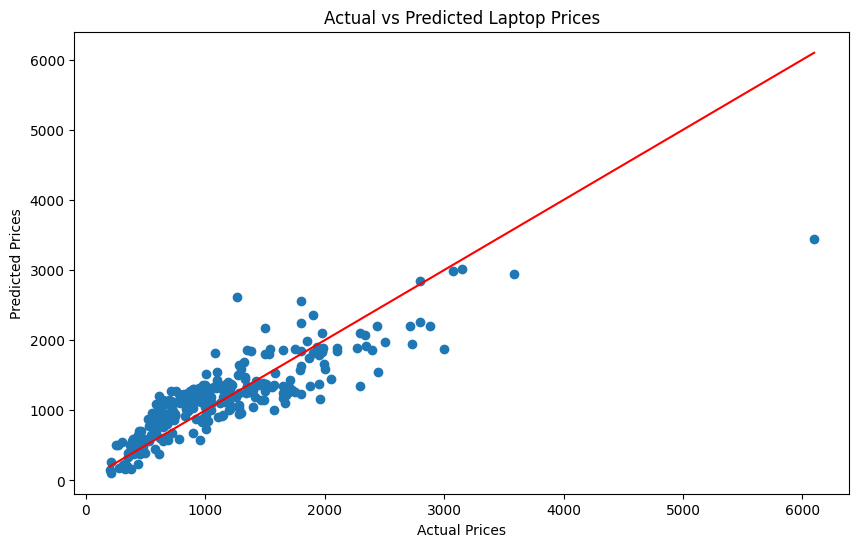

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Laptop Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()